# **CIS 520: Machine Learning**

## **Perceptrons**


- **Content Creators:** Amiel Orbach
- **Content Reviewers:**
- **Objectives:**

  - Understand the perceptron algorithm
  - Use perceptrons for linearly separable and non-linearly separable data
  - Use a multiclass perceptron to classify a real dataset
  - Understand the MIRA perceptron

In [1]:
%%capture
!pip install penngrader

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import dill
import base64

PennGrader setup (do not modify)

In [3]:
# For autograder only, do not modify this cell. 
# True for Google Colab, False for autograder
NOTEBOOK = (os.getenv('IS_AUTOGRADER') is None)
if NOTEBOOK:
    print("[INFO, OK] Google Colab.")
else:
    print("[INFO, OK] Autograder.")
    sys.exit()

[INFO, OK] Google Colab.


# Put your student ID here

In [59]:
STUDENT_ID = 57931095

In [60]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'CIS_5200_202230_HW_Perceptrons_WS', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 57931095

Make sure this correct or we will not be able to store your grade


In [61]:
# A helper function for grading utils
def grader_serialize(obj):        # A helper function
    '''Dill serializes Python object into a UTF-8 string'''
    byte_serialized = dill.dumps(obj, recurse = True)
    return base64.b64encode(byte_serialized).decode("utf-8")

## Linearly Separable Data

The simplest case is where we have linearly separable data. The perceptron algorithm should converge very quickly.

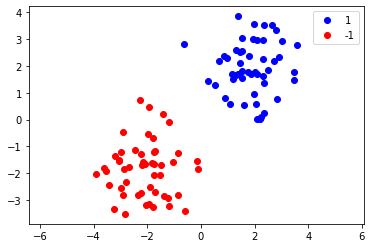

In [7]:
# Generate random data that is linearly separable and display it
np.random.seed(42)
data_lin_sep = np.empty((100, 3))
for i in range(50):
    data_lin_sep[i, 0] = 2 + np.random.randn()
    data_lin_sep[i, 1] = 2 + np.random.randn()
    data_lin_sep[i, 2] = 1
for i in range(50, 100):
    data_lin_sep[i, 0] = -2 + np.random.randn()
    data_lin_sep[i, 1] = -2 + np.random.randn()
    data_lin_sep[i, 2] = -1

plt.plot(data_lin_sep[:50, 0], data_lin_sep[:50, 1], 'bo', label='1')
plt.plot(data_lin_sep[50:, 0], data_lin_sep[50:, 1], 'ro', label='-1')
plt.legend()
plt.axis('equal')
plt.show()

In [8]:
# Shuffle and split the data
shuf_data_lin_sep = data_lin_sep.copy()
np.random.shuffle(shuf_data_lin_sep)
X_lin_sep = shuf_data_lin_sep[:, :-1]
y_lin_sep = shuf_data_lin_sep[:, -1]

Here is the perceptron algorithm (from the lecture slides). Make sure you understand it and how the train function implements it.

<img src='https://drive.google.com/uc?id=1KL7jVXxpdTyTnAgLLI9bA-lGn7tJP_WW'>

In [9]:
w_lin_sep = np.random.randn(2)

In [10]:
def train(X, y, w, max_iters):
    for iter in range(max_iters):
        made_error = False
        for i in range(X.shape[0]):
            pred = np.sign(w@X[i, :])
            if pred != y[i]:
                made_error = True
                w += y[i]*X[i, :]
        if not made_error:
            print('Converged in', iter+1, 'iteration(s)')
            return w
            break
    print("Didn't converge after", iter+1, 'iteration(s)')
    return w

In [11]:
w_lin_sep = train(X_lin_sep, y_lin_sep, w_lin_sep, max_iters=10)

Converged in 2 iteration(s)


In [12]:
w_lin_sep

array([0.94054788, 1.9752127 ])

In [13]:
# Define accuracy function for evaluation
def accuracy(X, y, w):
    correct = 0
    for i in range(X.shape[0]):
        pred = np.sign(w@X[i, :])
        if pred == y[i]:
            correct += 1
    return correct/X.shape[0]

Because the data is linearly separable, the perceptron should have an accuracy of 100%.

In [14]:
accuracy(X_lin_sep, y_lin_sep, w_lin_sep)

1.0

Now, we can plot the weight vector as well as the separating hyperplane on the graph of the datapoints. The weight vector should be pointing toward the blue (positive) points and away from the red (negative) points.

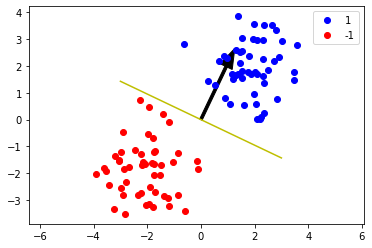

In [15]:
plt.plot(data_lin_sep[:50, 0], data_lin_sep[:50, 1], 'bo', label='1')
plt.plot(data_lin_sep[50:, 0], data_lin_sep[50:, 1], 'ro', label='-1')
plt.arrow(0, 0, w_lin_sep[0], w_lin_sep[1], width=0.1, head_width=0.5, color='k')
plt.plot([-3, 3], [3*w_lin_sep[0]/w_lin_sep[1], -3*w_lin_sep[0]/w_lin_sep[1]], color='y')
plt.legend()
plt.axis('equal')
plt.show()

Did the algorithm converge quickly and give 100% accuracy? (type "yes" or "no")

In [16]:
converged = 'yes'


In [17]:
grader.grade(test_case_id = 'test_case_convergence',answer = converged)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Non-Linearly Separable Data

When confronted with non-linearly separable data, the perceptron will encounter difficulties. Run the following to find out what happens.

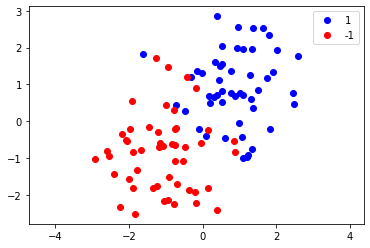

In [18]:
# Generate data that isn't linearly separable
np.random.seed(42)
data_non_sep = np.empty((100, 3))
for i in range(50):
    data_non_sep[i, 0] = 1 + np.random.randn()
    data_non_sep[i, 1] = 1 + np.random.randn()
    data_non_sep[i, 2] = 1
for i in range(50, 100):
    data_non_sep[i, 0] = -1 + np.random.randn()
    data_non_sep[i, 1] = -1 + np.random.randn()
    data_non_sep[i, 2] = -1

plt.plot(data_non_sep[:50, 0], data_non_sep[:50, 1], 'bo', label='1')
plt.plot(data_non_sep[50:, 0], data_non_sep[50:, 1], 'ro', label='-1')
plt.legend()
plt.axis('equal')
plt.show()

In [19]:
# Split the data
shuf_data_non_sep = data_non_sep.copy()
np.random.shuffle(shuf_data_non_sep)
X_non_sep = shuf_data_non_sep[:, :-1]
y_non_sep = shuf_data_non_sep[:, -1]

In [20]:
# Run the perceptron algorithm on the non-separable data
w_non_sep = np.random.randn(2)
w_non_sep = train(X_non_sep, y_non_sep, w_non_sep, max_iters=10000)

Didn't converge after 10000 iteration(s)


In [21]:
w_non_sep

array([1.18991285, 0.43469174])

In [22]:
accuracy(X_non_sep, y_non_sep, w_non_sep)

0.9

Plot the weight vector and separating hyperplane

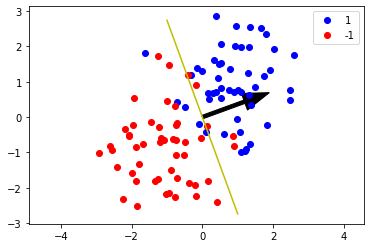

In [23]:
plt.plot(data_non_sep[:50, 0], data_non_sep[:50, 1], 'bo', label='1')
plt.plot(data_non_sep[50:, 0], data_non_sep[50:, 1], 'ro', label='-1')
plt.arrow(0, 0, w_non_sep[0], w_non_sep[1], width=0.1, head_width=0.5, color='k')
plt.plot([-1, 1], [1*w_non_sep[0]/w_non_sep[1], -1*w_non_sep[0]/w_non_sep[1]], color='y')
plt.legend()
plt.axis('equal')
plt.show()

What was the accuracy of the perceptron when the data wasn't linearly separable? (Write your answer as a decimal, up to two decimal places, e.g. 0.5 or 0.55)

In [24]:
new_acc = 0.9

In [25]:
grader.grade(test_case_id = 'test_case_non_sep_acc',answer = new_acc)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Using a Multiclass Perceptron on a Real Dataset

Use the Iris dataset to implement a multiclass perceptron.

In [26]:
# Get data and mean-center it (easier to visualize the weight vectors)
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset.data
X -= np.mean(X, axis=0)
y = dataset.target

Plot the data for each pair of features and all three classes. Are any features linearly separable?

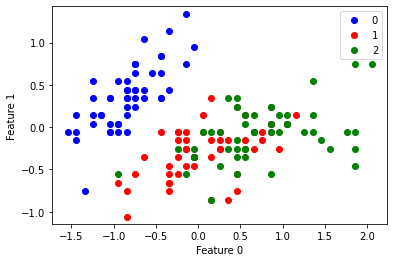

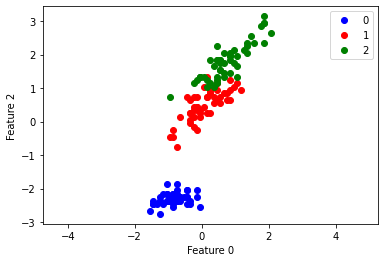

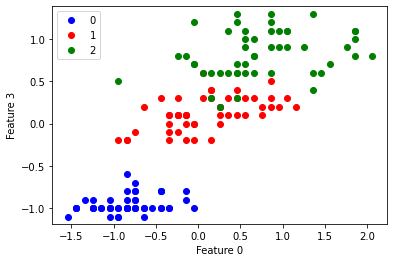

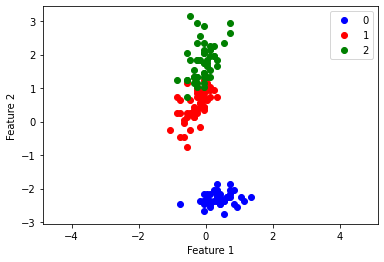

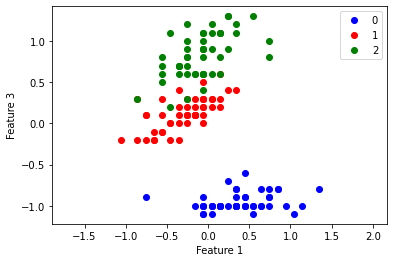

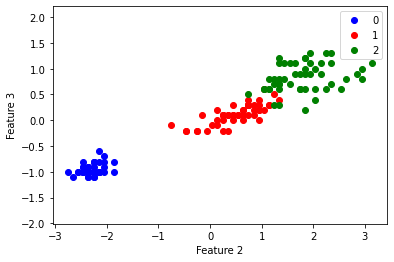

In [27]:
feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
for pair in feature_pairs:
    plt.plot(X[:50, pair[0]], X[:50, pair[1]], 'bo', label='0')
    plt.plot(X[50:100, pair[0]], X[50:100, pair[1]], 'ro', label='1')
    plt.plot(X[100:, pair[0]], X[100:, pair[1]], 'go', label='2')
    plt.legend()
    plt.axis('equal')
    plt.xlabel('Feature ' + str(pair[0]))
    plt.ylabel('Feature ' + str(pair[1]))
    plt.show()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
from sklearn.linear_model import Perceptron
clf = Perceptron(fit_intercept=False, random_state=0).fit(X_train, y_train)

In [30]:
print('Train Accuracy: ', clf.score(X_train, y_train))
print('Test Accuracy: ', clf.score(X_test, y_test))

Train Accuracy:  0.8125
Test Accuracy:  0.868421052631579


Was the perceptron able to perfectly separate the data? Type your answer as "yes" or "no".

In [31]:
separate_data = 'no'


In [32]:
grader.grade(test_case_id='test_case_separate_data',answer=separate_data)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Plot the weight vectors alongside the datapoints. Are the weights projected into the feature space pointing directly at the clusters of blues, reds, and greens? If not, think about why not.

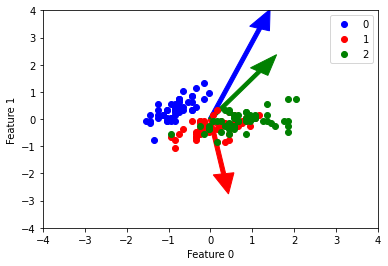

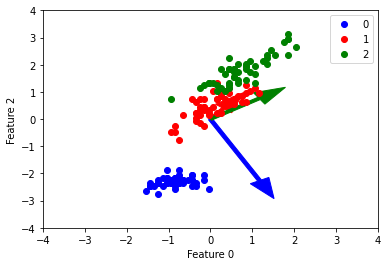

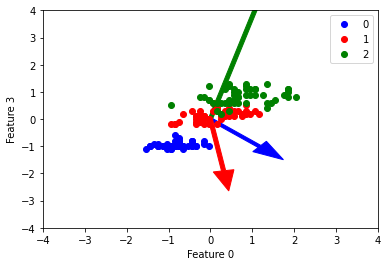

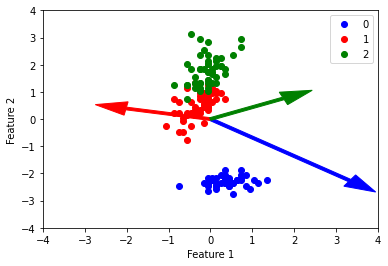

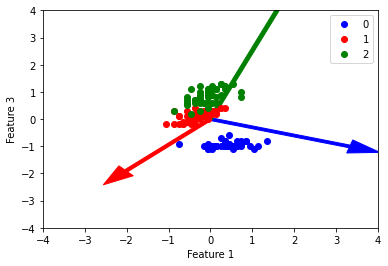

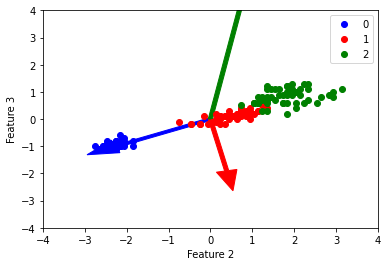

In [33]:
feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
for pair in feature_pairs:
    plt.plot(X[:50, pair[0]], X[:50, pair[1]], 'bo', label='0')
    plt.plot(X[50:100, pair[0]], X[50:100, pair[1]], 'ro', label='1')
    plt.plot(X[100:, pair[0]], X[100:, pair[1]], 'go', label='2')
    plt.arrow(0, 0, clf.coef_[0, pair[0]], clf.coef_[0, pair[1]], width=0.1, head_width=0.5, color='b')
    plt.arrow(0, 0, clf.coef_[1, pair[0]], clf.coef_[1, pair[1]], width=0.1, head_width=0.5, color='r')
    plt.arrow(0, 0, clf.coef_[2, pair[0]], clf.coef_[2, pair[1]], width=0.1, head_width=0.5, color='g')
    plt.legend()
    plt.axis([-4, 4, -4, 4])
    plt.xlabel('Feature ' + str(pair[0]))
    plt.ylabel('Feature ' + str(pair[1]))
    plt.show()

If the classes are not linearly separable, try to find combinations of two classes that can be linearly separated based on two features (e.g. classes 0 and 1 can be separated by using features 0 and 2). There are several such options to choose from. Train a perceptron to classify your chosen classes with 100% accuracy.

In [34]:
def select_features_and_classes(X, first_feature, second_feature, first_class, second_class):
    if first_feature == second_feature or first_class == second_class:
        print('Invalid choice')
        return None, None
    X_temp = np.empty((100, 4))
    X_partial = np.empty((100, 2))
    y_partial = np.concatenate((min(first_class, second_class)*np.ones(50,), max(first_class, second_class)*np.ones(50,)))
    if y_partial[0] == 0:
        X_temp[:50, :] = X[:50, :]
        if y_partial[-1] == 1:
            X_temp[50:100, :] = X[50:100, :]
        else:
            X_temp[50:100, :] = X[100:, :]
    else:
        X_temp = X[50:, :]
    
    X_partial[:, 0] = X_temp[:, min(first_feature, second_feature)]
    X_partial[:, 1] = X_temp[:, max(first_feature, second_feature)]

    return X_partial, y_partial

In [42]:
dataset = load_iris()
X = dataset.data
y = dataset.target

In [47]:
first_feature =  0 #TODO: replace with your own choice of feature
second_feature = -1  #TODO: replace with your own choice of feature
first_class = 0 #TODO: replace with your own choice of class
second_class = 1  #TODO: replace with your own choice of class

X_partial, y_partial = select_features_and_classes(X, first_feature, second_feature, first_class, second_class)

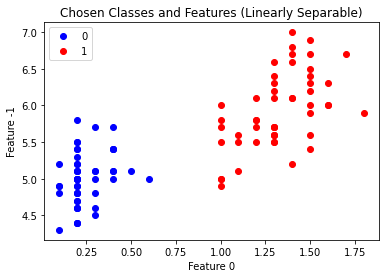

In [48]:
plt.plot(X_partial[:50, 0], X_partial[:50, 1], 'bo', label=str(first_class))
plt.plot(X_partial[50:, 0], X_partial[50:, 1], 'ro', label=str(second_class))
plt.legend()
plt.xlabel('Feature ' + str(first_feature))
plt.ylabel('Feature ' + str(second_feature))
plt.title('Chosen Classes and Features (Linearly Separable)')
plt.show()

Here, you can see if you were able to separate the data with a weight vector/hyperplane that achieves 100% accuracy.

In [49]:
X_train_partial, X_test_partial, y_train_partial, y_test_partial = train_test_split(X_partial, y_partial, test_size=0.25, random_state=42)
clf_partial = Perceptron(fit_intercept=True, random_state=0).fit(X_train_partial, y_train_partial)
print('Train Accuracy: ', clf_partial.score(X_train_partial, y_train_partial))
print('Test Accuracy: ', clf_partial.score(X_test_partial, y_test_partial))

Train Accuracy:  1.0
Test Accuracy:  1.0


Were you able to find a combination of two classes that can be linearly separated by two features? Type your answer as "yes" or "no".

In [50]:
separate_classes = 'yes'


In [51]:
grader.grade(test_case_id='test_case_separate_classes',answer=separate_classes)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## MIRA

The Margin-Infused Relaxed Algorithm (MIRA) is a variation on the perceptron algorithm. It adjusts the weight vector not by $y_i \vec{x_i}$ but by scaling $\vec{x_i}$ by a factor that depends on $w_i$, $\vec{x_i}$, and $y_i$. It classifies the newly seen point correctly but adjusts the weight vector, and therefore the separating hyperplane, by the minimum amount possible. That is why MIRA is known as a passive aggressive perceptron (aggressive because it classifies the new point correctly and passive because it only barely does that, and doesn't push further). See the following equation (from the lecture slides).

<img src='https://drive.google.com/uc?id=19if6M2TVl51snMCfsVlwoG5fLXib2ki4'>

In [52]:
def train_MIRA(X, y, w, max_iters):
    for iter in range(max_iters):
        made_error = False
        for i in range(X.shape[0]):
            pred = np.sign(w@X[i, :])
            if pred != y[i]:
                made_error = True
                w += ((y[i]-w@X[i, :])/np.linalg.norm(X[i, :])**2)*X[i, :]
        if not made_error:
            print('Converged in', iter+1, 'iteration(s)')
            return w
            break
    print("Didn't converge after", iter+1, 'iteration(s)')
    return w

In [53]:
w_MIRA = np.random.rand(2)
w_MIRA = train_MIRA(X_lin_sep, y_lin_sep, w_MIRA, 1000)

Converged in 2 iteration(s)


In [54]:
w_MIRA

array([0.60405853, 0.37072295])

In [55]:
accuracy(X_lin_sep, y_lin_sep, w_MIRA)

1.0

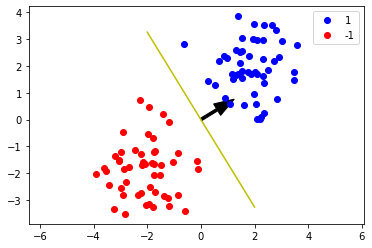

In [56]:
plt.plot(data_lin_sep[:50, 0], data_lin_sep[:50, 1], 'bo', label='1')
plt.plot(data_lin_sep[50:, 0], data_lin_sep[50:, 1], 'ro', label='-1')
plt.arrow(0, 0, w_MIRA[0], w_MIRA[1], width=0.1, head_width=0.5, color='k')
plt.plot([-2, 2], [2*w_MIRA[0]/w_MIRA[1], -2*w_MIRA[0]/w_MIRA[1]], color='y')
plt.legend()
plt.axis('equal')
plt.show()

Did MIRA converge to 100% accuracy? Type your answer as "yes" or "no".

In [57]:
mira_converge = 'yes'


In [58]:
grader.grade(test_case_id='test_case_mira',answer=mira_converge)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# Submitting to the Autograder

First of all, please run your notebook from beginning to end and ensure you are getting all the points from the autograder!

Then go to the File menu and choose "Download .ipynb".  Go to [Gradescope](https://www.gradescope.com/courses/409970) and:

1. From "File" --> Download both .ipynb and .py files
1. Name these files `Perceptrons_WS.ipynb` and `Perceptrons_WS.py` respectively
1. Sign in using your Penn email address (if you are a SEAS student we recommend using the Google login) and ensure  your class is "CIS 5200"
1. Select **Worksheet: Perceptrons**
1. Upload both files
1. PLEASE CHECK THE AUTOGRADER OUTPUT TO ENSURE YOUR SUBMISSION IS PROCESSED CORRECTLY!

You should be set! Note that this assignment has 7 autograded points that will show up upon submission. Points are awarded based on a combination of correctness and sufficient effort. 